# Test_data資料預處理

In [77]:
import os
import numpy as np
import pandas as pd

filepath = '/Users/mac/Desktop/Kaggle_datasets/20170824_Titanic/'
filename = 'train.csv'

df = pd.read_csv(os.path.join(filepath+filename))

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [78]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
cols = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
df = df[cols]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [80]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Sex']= df['Sex'].map({'female':0, 'male': 1}).astype(int)
df = pd.get_dummies(data=df, columns=["Embarked"])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [81]:
df.shape

(891, 10)

In [82]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

告一段落，準備要製作feature和label

In [86]:
all_array = df.values
all_array

array([[ 0.,  3.,  1., ...,  0.,  0.,  1.],
       [ 1.,  1.,  0., ...,  1.,  0.,  0.],
       [ 1.,  3.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  3.,  0., ...,  0.,  0.,  1.],
       [ 1.,  1.,  1., ...,  1.,  0.,  0.],
       [ 0.,  3.,  1., ...,  0.,  1.,  0.]])

In [92]:
train_feature_raw = all_array[:,1:]
train_label = all_array[:,0]

In [93]:
train_feature_raw[0:5]

array([[  3.    ,   1.    ,  22.    ,   1.    ,   0.    ,   7.25  ,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   0.    ,  38.    ,   1.    ,   0.    ,  71.2833,
          1.    ,   0.    ,   0.    ],
       [  3.    ,   0.    ,  26.    ,   0.    ,   0.    ,   7.925 ,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   0.    ,  35.    ,   1.    ,   0.    ,  53.1   ,
          0.    ,   0.    ,   1.    ],
       [  3.    ,   1.    ,  35.    ,   0.    ,   0.    ,   8.05  ,
          0.    ,   0.    ,   1.    ]])

In [94]:
train_label[0:5]

array([ 0.,  1.,  1.,  1.,  0.])

In [96]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_feature = minmax_scale.fit_transform(train_feature_raw)

train_feature[0:5]

array([[ 1.        ,  1.        ,  0.27117366,  0.125     ,  0.        ,
         0.01415106,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.4722292 ,  0.125     ,  0.        ,
         0.13913574,  1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.32143755,  0.        ,  0.        ,
         0.01546857,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.43453129,  0.125     ,  0.        ,
         0.1036443 ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  1.        ,  0.43453129,  0.        ,  0.        ,
         0.01571255,  0.        ,  0.        ,  1.        ]])

## 統整整個資料preprocessing過程（這樣才方便處理test data）

In [ ]:
def Preprocessingdata(raw_data):
    df = pd.read_csv(raw_data)
    cols = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
    df = df[cols]
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Sex']= df['Sex'].map({'female':0, 'male': 1}).astype(int)
    df = pd.get_dummies(data=df, columns=["Embarked"])
    
    all_array = df.values
    train_feature_raw = all_array[:,1:]
    train_label = all_array[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_feature = minmax_scale.fit_transform(train_feature_raw) 
    
    return train_feature, train_label
    
filepath = '/Users/mac/Desktop/Kaggle_datasets/20170824_Titanic/'
filename = 'train.csv'    
raw_data = os.path.join(filepath+filename)

# 跑模型囉！！

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 200)               2000      
_________________________________________________________________
dropout_17 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_18 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 101       
Total params: 22,201
Trainable params: 22,201
Non-trainable params: 0
_________________________________________________________________
None
Train on 712 samples, validate on 179 samples
Epoch 1/20
0s - loss: 0.6652 - acc: 0.6053 - val_loss: 0.5932 - val_acc: 0.6425
Epoch 2

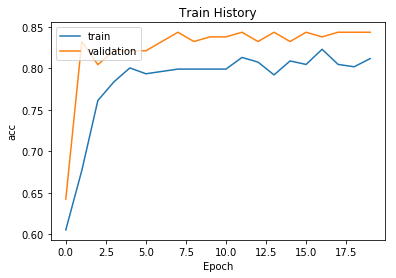

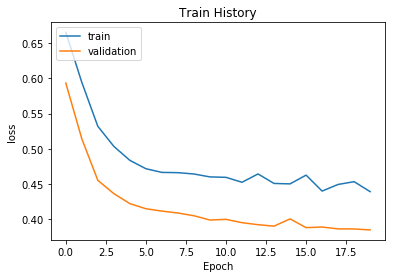

model saved to disk


In [104]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


######################### 建立模型
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential() #一層一層到底，按順序

#輸入層（隱藏層1）
model.add(Dense(units=200, 
                input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

#使用dropout避免overfitting
model.add(Dropout(0.5))

#隱藏層2，不用寫input_dim，因為就是前一層的units
model.add(Dense(units=100,  
                kernel_initializer='uniform', 
                activation='relu'))

#使用dropout避免overfitting
model.add(Dropout(0.5))


#輸出層
model.add(Dense(units=1, #輸出一個數字 
                kernel_initializer='uniform', 
                activation='sigmoid'))

print(model.summary()) #可以清楚看到model還有參數數量


######################### 訓練模型
#選擇loss度量，optimizer學習路徑速度、
model.compile(loss='binary_crossentropy',   #二元用binary
              optimizer='adam', metrics=['accuracy'])

#開始train，並且記錄情況(設有val項以免overfitting)
train_history=model.fit(x=train_feature, y=train_label,
                        validation_split=0.2, epochs=20, batch_size=20, verbose=2) #verbose=2表示顯示訓練過程


######################### 訓練過程視覺化
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

#儲存訓練結果
model.save_weights("Savemodel/Titanic(Kaggles)_MLP.h5")
print('model saved to disk')

# test_data資料預處理，完畢後就可以正式考試了

In [105]:
filepath = '/Users/mac/Desktop/Kaggle_datasets/20170824_Titanic/'
filename = 'test.csv'

df2 = pd.read_csv(os.path.join(filepath+filename))

df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
df2 = df2[cols]
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())
df2['Sex']= df2['Sex'].map({'female':0, 'male': 1}).astype(int)
df2 = pd.get_dummies(data=df2, columns=["Embarked"])
df2.head()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [109]:
df2.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [110]:
df2['Fare'] = df2['Fare'].fillna(df2['Fare'].mean())

In [111]:
df2.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [112]:
test_feature_raw = df2.values

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
test_feature = minmax_scale.fit_transform(test_feature_raw) 

# 正式考試預測

In [113]:
######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(test_feature)

 32/418 [=>............................] - ETA: 2s

In [115]:
prediction[0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [123]:
filepath = '/Users/mac/Desktop/Kaggle_datasets/20170824_Titanic/'
filename = 'prediction.csv'

df3['Survived'] = pd.DataFrame(prediction)

df3.to_csv(os.path.join(filepath+filename))

In [124]:
df3.tail()

,0,Survived
413,0,0
414,1,1
415,0,0
416,0,0
417,0,0
